
# Experiments with Tensorflow on MNIST


In [154]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

In [171]:
def train_mnist():
    
    class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if logs.get('accuracy') is not None and logs.get('accuracy') > 0.99:
                acc = logs.get('accuracy')
                print(f'\nReached {acc*100:2.1f}% training accuracy, stopping training.')
                self.model.stop_training = True
    callback = myCallback()

    mnist = tf.keras.datasets.mnist

    (x_train, y_train),(x_test, y_test) = mnist.load_data()
    
    x_train = x_train / 255.0
    x_test = x_test / 255.0
    
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(512, activation="relu"),
        #keras.layers.Dropout(0.5),
        keras.layers.Dense(128, activation="relu"),
        #keras.layers.Dropout(0.5),
        keras.layers.Dense(10, activation="softmax")
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(x_train, y_train, epochs=10, callbacks= [callback])
    
    return history.epoch, history.history['accuracy'][-1]

In [172]:
train_mnist()

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1899 - accuracy: 0.9437
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0804 - accuracy: 0.9746
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0539 - accuracy: 0.9829
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0401 - accuracy: 0.9872
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0337 - accuracy: 0.9893
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0268 - accuracy: 0.9910

Reached 99.1% training accuracy, stopping training.


([0, 1, 2, 3, 4, 5], 0.9909833073616028)

In [157]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"x_train : {x_train.shape}\ny_train : {y_train.shape}\nx_test : {x_test.shape}\ny_test : {y_test.shape}")

x_train : (60000, 28, 28)
y_train : (60000,)
x_test : (10000, 28, 28)
y_test : (10000,)


MNIST dataset, pictures of handwritten digits ranging from 0 to 9. A dataset used as a staple for algorithm evaluation for a long time but nowadays outdated. Replaced by FASHION MNIST.

In [158]:
x_train = x_train / 255.0
x_test = x_test / 255.0

Normalizing pixels' range value from 0-255 to 0-1 to diminish the standard deviation and impact on training, especially retropropagation and loss.

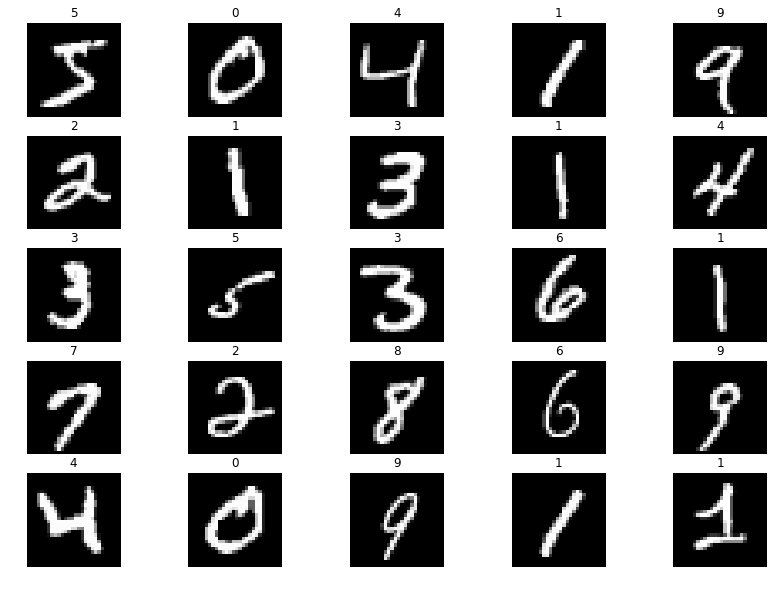

In [159]:
fig = plt.figure(figsize=(14, 10))

for i in range(25):
    fig.add_subplot(5, 5, i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.axis('off')
    plt.title(y_train[i])
        
plt.show()

We can observe that the digits are written in white over a black font in the diversity of writting styles.  
This will have an impact on recognition abilities as it will be shown later.

In [168]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.99:
            acc = logs.get('accuracy')
            print(f'\nReached {acc*100:2.1f}% training accuracy, stopping training.')
            self.model.stop_training = True

In [169]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation="relu"),
    #keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation="relu"),
    #keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [170]:
callback = myCallback()
model.fit(x_train, y_train, epochs=10, callbacks= [callback])

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1886 - accuracy: 0.9434
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0803 - accuracy: 0.9749
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0548 - accuracy: 0.9829
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0401 - accuracy: 0.9872
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0320 - accuracy: 0.9899
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0240 - accuracy: 0.9920

Reached 99.2% training accuracy, stopping training.


In [175]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0849 - accuracy: 0.9790


[0.08485222607851028, 0.9789999723434448]

[[7.9241298e-29 2.9343663e-24 6.4558284e-21 2.5338313e-24 4.3350760e-31
  5.6998540e-22 0.0000000e+00 1.0000000e+00 2.7605134e-27 1.3468297e-13]]
7


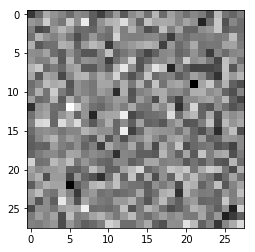

In [266]:
x = tf.random.normal((1, 28, 28, 1))
plt.imshow(x.numpy().reshape(28, 28), cmap="gray")
res = model.predict(x)
print(res)
print(res.argmax())

In this random mass of pixels, the model sees a peculiar number with 100% certainty. It sees what isn't there, an trivia that is important to remember about AI.

In [1]:
import cv2

In [126]:
png = cv2.imread("chiffre_2.png")
png_array = np.array(png)
png_array

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

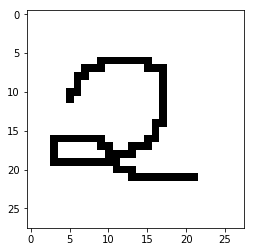

In [127]:
plt.imshow(png)

In [128]:
png_array.shape

(28, 28, 3)

In [129]:
a = []
for x in range(28):
    a.append([])
    for y in range(28):
        a[x].append(png_array[x][y][1])
png_array = np.array(a)

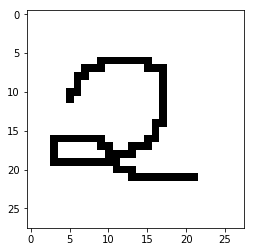

In [130]:
plt.imshow(png_array.reshape(28, 28), cmap="gray")

In [134]:
png_array = png_array.reshape(1, 28, 28)

In [135]:
model.predict(png_array).argmax()

5

We see there that the network fails on its prediction on the image. We can make the observation that the training images are inversed in their color scheme, a black background and white digit.

In [136]:
for x in range(28):
    for y in range(28):
        png_array[0][x][y] = 255 - png_array[0][x][y]

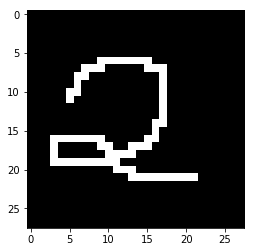

In [138]:
plt.imshow(png_array.reshape(28, 28), cmap="gray")

In [139]:
model.predict(png_array).argmax()

2

We see that when we swap the color scheme to get a white digit, the network is able to correctly predict that the digit is 2.  
This is due in my opinion to a bias toward the training data being only made of white digits on a black background.  
In order to get a network able to properly recognize black and white digits the training set needs to be adapted.

In [255]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Let's try to change half the training and test set by inversing the colors. We do that by substracting the pixel value to the maximum value it can take, 255 in order to cycle around it.  

0 for black gives us 255-0 = 255, white.  

255 for white gives us 0, black.  

Let's see how fast this takes.

In [231]:
import time

start = time.time()

for i in range((int(x_train.shape[0]/2))):
    for x in range(28):
        for y in range(28):
            x_train[i][x][y] = 255 - x_train[i][x][y]
            
for i in range((int(x_test.shape[0]/2))):
    for x in range(28):
        for y in range(28):
            x_test[i][x][y] = 255 - x_test[i][x][y]
            
end = time.time()

print(f"Execution finished. Time elapsed : {end-start:}s")

Execution finished. Time elapsed : 91.36565351486206s


Quite a long time in perspective of the one required for training the neural network, there has to be a better way than brutish built-in python lists and for loops.

In [253]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [228]:
import threading

class myThread(threading.Thread):
    def __init__(self, threadID, images, slice_start, slice_end):
        threading.Thread.__init__(self)
        self.threadID = threadID
        self.images = images
        self.slice_start = slice_start
        self.slice_end = slice_end
    
    def run(self):
        for i in range(self.slice_end-self.slice_start):
            for x in range(28):
                for y in range(28):
                    self.images[i+self.slice_start][x][y] = 255 - self.images[i+self.slice_start][x][y]

base_slice = (int(x_train.shape[0]/8))
slice_num = 4
threads = []

def changeImages(images, threads_list= threads):
    base_slice = (int(images.shape[0]/8))
    slice_num = 4
    for i in range(slice_num):
        thread = myThread(i, images, (base_slice*i), (base_slice*(i+1)) )
        thread.start()
        threads_list.append(thread)

start = time.time()

changeImages(x_train)
changeImages(x_test)
       
for t in threads:
    t.join()
    
end = time.time()

print(f"Execution finished. Time elapsed : {end-start:}s")

Execution finished. Time elapsed : 93.02585935592651s


No real improvement there even by using threads. Python must he waiting for the first access to the list memory location to end before going to passing the control to the next thread.  
We're not getting any improvement when we could really hope for better performance for a meager 35k cells to modify.

In [259]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [260]:
start = time.time()

x_train = np.array(x_train)
x_train[0:int(x_train.shape[0]/2)] = 255 - x_train[0:int(x_train.shape[0]/2)]

x_test = np.array(x_test)
x_test[0:int(x_test.shape[0]/2)] = 255 - x_test[0:int(x_test.shape[0]/2)]

end = time.time()

print(f"Execution finished. Time elapsed : {end-start:}s")

Execution finished. Time elapsed : 0.04800009727478027s


Instead, let's use numpy by turning our python built-in lists in numpy arrays and use their broadcasting function to execute operation quickly in parallel on easily made slices.  

Since the shapes of the training and test set is (number of images, 28, 28) we can tell numpy to access the first half of each set and replace the value of the cell by 255 minus its current value.  

Since we used a slice, our selection cover all the elements covered by the slice on the axis it is made and all the other cells covered beneath it since we didn't precise any further input for following axis.

The time required for the operation is 0.05s, which is approximately 1850 times faster than the bruteforce manner we first used !

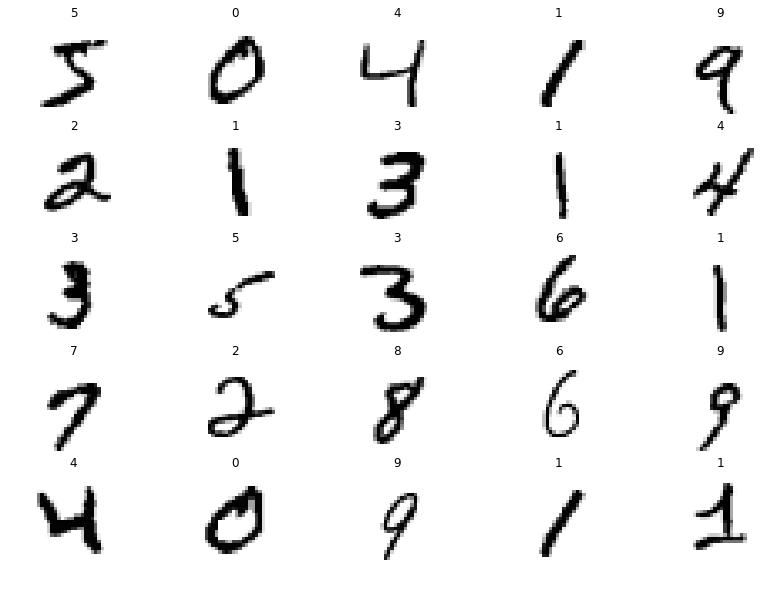

In [261]:
fig = plt.figure(figsize=(14, 10))

for i in range(25):
    fig.add_subplot(5, 5, i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.axis('off')
    plt.title(y_train[i])
        
plt.show()

We got black digits on white background just like we wanted ! Perfect !

In [262]:
x_train = x_train / 255.0
x_test = x_test / 255.0

Let's not forget to reduce the pixels' value to a 0-1 range like we saw earlier.

In [263]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation="relu"),
    #keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation="relu"),
    #keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [264]:
callback = myCallback()
model.fit(x_train, y_train, epochs=10, callbacks= [callback], shuffle= True)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4249 - accuracy: 0.8673
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2266 - accuracy: 0.9293
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1711 - accuracy: 0.9464
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1440 - accuracy: 0.9549
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1258 - accuracy: 0.9613
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1108 - accuracy: 0.9646
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0980 - accuracy: 0.9695
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0935 - accuracy: 0.9715
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0823 - accuracy: 0.9741
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.078

We can see a slight decrease in the initial accuracy and through the following epochs, the model does not reach the 99% accuracy threshold of earlier thus not triggering the callback function.  

Please note the shuffle argument set to True, it is important that we shuffle the training dataset as we have swapped the color pattern for the first half of it. We don't want the network to get batches made of only one type of pattern which could mess with its training.

In [265]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1440 - accuracy: 0.9602


[0.1440378576517105, 0.9602000117301941]

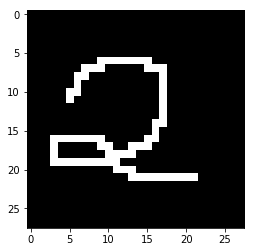

In [268]:
plt.imshow(png_array.reshape(28, 28), cmap="gray")

In [269]:
model.predict(png_array).argmax()

2

In [270]:
for x in range(28):
    for y in range(28):
        png_array[0][x][y] = 255 - png_array[0][x][y]

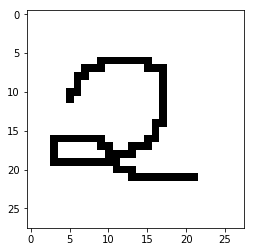

In [271]:
plt.imshow(png_array.reshape(28, 28), cmap="gray")

In [272]:
model.predict(png_array).argmax()

2

It now correctly identifies the digit wether or not it is on a white or black background ! That's better.  

For the record, this is truly unseen data for the model, i drew this digit myself on MSPaint as a png file.

5

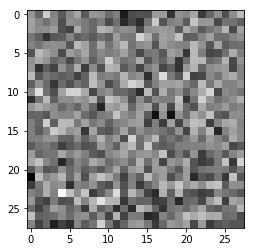

In [273]:
x = tf.random.normal((1, 28, 28, 1))
plt.imshow(x.numpy().reshape(28, 28), cmap="gray")
res = model.predict(x)
res.argmax()